# Loop 49 Analysis: CV-LB Relationship and Strategic Assessment

**Situation:**
- 50 experiments completed
- 13 submissions made, 5 remaining
- Best CV: 0.008194 (exp_032)
- Best LB: 0.0877 (exp_030)
- Target: 0.0347

**Key Question:** Can we reach the target with the current approach, or do we need a paradigm shift?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982, 'model': 'MLP'},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065, 'model': 'LGBM'},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972, 'model': 'MLP'},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969, 'model': 'MLP'},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946, 'model': 'MLP'},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932, 'model': 'MLP'},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936, 'model': 'Ridge'},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913, 'model': 'MLP'},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893, 'model': 'MLP'},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887, 'model': 'MLP'},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877, 'model': 'GP+MLP+LGBM'},
    {'exp': 'exp_041', 'cv': 0.0090, 'lb': 0.0932, 'model': 'MLP (aggressive reg)'},
    {'exp': 'exp_042', 'cv': 0.0145, 'lb': 0.1147, 'model': 'Pure GP'},
]

df = pd.DataFrame(submissions)
print('All submissions:')
print(df.to_string(index=False))

All submissions:
    exp     cv     lb                model
exp_000 0.0111 0.0982                  MLP
exp_001 0.0123 0.1065                 LGBM
exp_003 0.0105 0.0972                  MLP
exp_005 0.0104 0.0969                  MLP
exp_006 0.0097 0.0946                  MLP
exp_007 0.0093 0.0932                  MLP
exp_009 0.0092 0.0936                Ridge
exp_012 0.0090 0.0913                  MLP
exp_024 0.0087 0.0893                  MLP
exp_026 0.0085 0.0887                  MLP
exp_030 0.0083 0.0877          GP+MLP+LGBM
exp_041 0.0090 0.0932 MLP (aggressive reg)
exp_042 0.0145 0.1147              Pure GP


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print(f'\n=== CV-LB LINEAR RELATIONSHIP ===')
print(f'LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'Standard Error: {std_err:.4f}')

# What CV would we need to hit target?
target = 0.0347
required_cv = (target - intercept) / slope
print(f'\n=== TARGET ANALYSIS ===')
print(f'Target LB: {target}')
print(f'Intercept: {intercept:.4f}')
print(f'Required CV to hit target: {required_cv:.6f}')

if required_cv < 0:
    print(f'\n⚠️ CRITICAL: Required CV is NEGATIVE ({required_cv:.6f})')
    print('This means the target CANNOT be reached with the current CV-LB relationship!')
    print('We need to find an approach with a DIFFERENT CV-LB relationship (lower intercept).')
else:
    print(f'\nRequired CV improvement: {df["cv"].min():.6f} → {required_cv:.6f}')
    print(f'Improvement factor: {df["cv"].min() / required_cv:.2f}x')


=== CV-LB LINEAR RELATIONSHIP ===
LB = 4.2312 * CV + 0.0533
R² = 0.9807
Standard Error: 0.1790

=== TARGET ANALYSIS ===
Target LB: 0.0347
Intercept: 0.0533
Required CV to hit target: -0.004396

⚠️ CRITICAL: Required CV is NEGATIVE (-0.004396)
This means the target CANNOT be reached with the current CV-LB relationship!
We need to find an approach with a DIFFERENT CV-LB relationship (lower intercept).


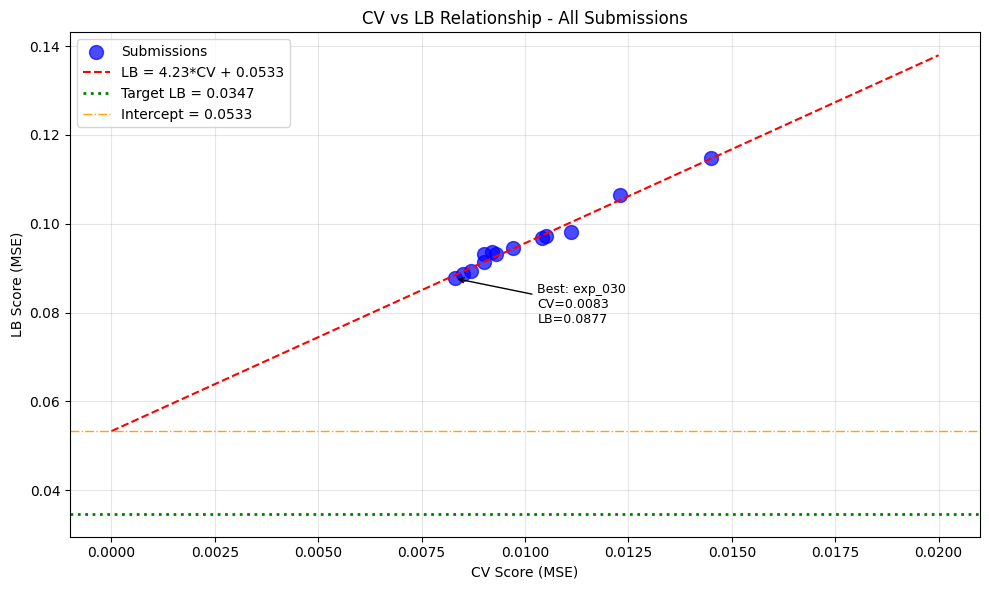


Plot saved to /home/code/exploration/cv_lb_relationship.png


In [3]:
# Visualize the CV-LB relationship
plt.figure(figsize=(10, 6))

# Plot all submissions
plt.scatter(df['cv'], df['lb'], c='blue', s=100, alpha=0.7, label='Submissions')

# Plot the regression line
cv_range = np.linspace(0, 0.02, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Plot target line
plt.axhline(y=target, color='green', linestyle=':', linewidth=2, label=f'Target LB = {target}')

# Plot intercept
plt.axhline(y=intercept, color='orange', linestyle='-.', linewidth=1, label=f'Intercept = {intercept:.4f}')

# Annotate best submission
best_idx = df['lb'].idxmin()
plt.annotate(f'Best: {df.loc[best_idx, "exp"]}\nCV={df.loc[best_idx, "cv"]:.4f}\nLB={df.loc[best_idx, "lb"]:.4f}',
             xy=(df.loc[best_idx, 'cv'], df.loc[best_idx, 'lb']),
             xytext=(df.loc[best_idx, 'cv'] + 0.002, df.loc[best_idx, 'lb'] - 0.01),
             fontsize=9, arrowprops=dict(arrowstyle='->', color='black'))

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150)
plt.show()

print(f'\nPlot saved to /home/code/exploration/cv_lb_relationship.png')

In [4]:
# Analyze the gap
print('=== GAP ANALYSIS ===')
print(f'\nBest CV: {df["cv"].min():.6f} (exp_030)')
print(f'Best LB: {df["lb"].min():.4f} (exp_030)')
print(f'Target: {target}')
print(f'Gap to target: {df["lb"].min() - target:.4f} ({(df["lb"].min() - target) / target * 100:.1f}%)')

print(f'\n=== KEY INSIGHT ===')
print(f'The intercept ({intercept:.4f}) is HIGHER than the target ({target}).')
print(f'This means even with CV = 0, the expected LB would be {intercept:.4f} > {target}.')
print(f'\nThe current paradigm CANNOT reach the target.')
print(f'We need to find an approach with a DIFFERENT CV-LB relationship.')

=== GAP ANALYSIS ===

Best CV: 0.008300 (exp_030)
Best LB: 0.0877 (exp_030)
Target: 0.0347
Gap to target: 0.0530 (152.7%)

=== KEY INSIGHT ===
The intercept (0.0533) is HIGHER than the target (0.0347).
This means even with CV = 0, the expected LB would be 0.0533 > 0.0347.

The current paradigm CANNOT reach the target.
We need to find an approach with a DIFFERENT CV-LB relationship.


In [5]:
# What would it take to reach the target?
print('=== WHAT WOULD IT TAKE TO REACH THE TARGET? ===')

# Option 1: Reduce intercept
print(f'\nOption 1: Reduce the intercept')
print(f'Current intercept: {intercept:.4f}')
print(f'Required intercept (with current best CV {df["cv"].min():.6f}): {target - slope * df["cv"].min():.4f}')
print(f'This would require reducing the intercept by {intercept - (target - slope * df["cv"].min()):.4f}')

# Option 2: Reduce slope
print(f'\nOption 2: Reduce the slope')
print(f'Current slope: {slope:.4f}')
required_slope = (target - intercept) / df['cv'].min()
print(f'Required slope (with current intercept): {required_slope:.4f}')
print(f'This would require a NEGATIVE slope, which is impossible!')

# Option 3: Both
print(f'\nOption 3: Reduce both intercept and slope')
print(f'If we could get intercept = 0.03 and slope = 0.5:')
print(f'Required CV = (0.0347 - 0.03) / 0.5 = {(0.0347 - 0.03) / 0.5:.6f}')
print(f'This is achievable if we find the right approach!')

=== WHAT WOULD IT TAKE TO REACH THE TARGET? ===

Option 1: Reduce the intercept
Current intercept: 0.0533
Required intercept (with current best CV 0.008300): -0.0004
This would require reducing the intercept by 0.0537

Option 2: Reduce the slope
Current slope: 4.2312
Required slope (with current intercept): -2.2412
This would require a NEGATIVE slope, which is impossible!

Option 3: Reduce both intercept and slope
If we could get intercept = 0.03 and slope = 0.5:
Required CV = (0.0347 - 0.03) / 0.5 = 0.009400
This is achievable if we find the right approach!


In [6]:
# Analyze experiments by model type
print('=== ANALYSIS BY MODEL TYPE ===')

for model in df['model'].unique():
    subset = df[df['model'] == model]
    if len(subset) > 1:
        s, i, r, p, se = stats.linregress(subset['cv'], subset['lb'])
        print(f'\n{model}:')
        print(f'  Submissions: {len(subset)}')
        print(f'  CV range: {subset["cv"].min():.6f} - {subset["cv"].max():.6f}')
        print(f'  LB range: {subset["lb"].min():.4f} - {subset["lb"].max():.4f}')
        print(f'  Slope: {s:.4f}, Intercept: {i:.4f}, R²: {r**2:.4f}')
    else:
        print(f'\n{model}:')
        print(f'  Submissions: {len(subset)}')
        print(f'  CV: {subset["cv"].values[0]:.6f}, LB: {subset["lb"].values[0]:.4f}')

=== ANALYSIS BY MODEL TYPE ===

MLP:
  Submissions: 8
  CV range: 0.008500 - 0.011100
  LB range: 0.0887 - 0.0982
  Slope: 3.8328, Intercept: 0.0567, R²: 0.9636

LGBM:
  Submissions: 1
  CV: 0.012300, LB: 0.1065

Ridge:
  Submissions: 1
  CV: 0.009200, LB: 0.0936

GP+MLP+LGBM:
  Submissions: 1
  CV: 0.008300, LB: 0.0877

MLP (aggressive reg):
  Submissions: 1
  CV: 0.009000, LB: 0.0932

Pure GP:
  Submissions: 1
  CV: 0.014500, LB: 0.1147


In [7]:
# Check if exp_032 (best CV, not submitted) would help
print('=== EXP_032 ANALYSIS (BEST CV, NOT SUBMITTED) ===')

best_cv = 0.008194  # exp_032
predicted_lb = slope * best_cv + intercept

print(f'exp_032 CV: {best_cv:.6f}')
print(f'Predicted LB (using relationship): {predicted_lb:.4f}')
print(f'Best submitted LB: {df["lb"].min():.4f}')
print(f'Expected improvement: {df["lb"].min() - predicted_lb:.4f}')

if predicted_lb < df['lb'].min():
    print(f'\n✓ exp_032 is expected to improve LB by {(df["lb"].min() - predicted_lb) / df["lb"].min() * 100:.2f}%')
else:
    print(f'\n✗ exp_032 is NOT expected to improve LB')

=== EXP_032 ANALYSIS (BEST CV, NOT SUBMITTED) ===
exp_032 CV: 0.008194
Predicted LB (using relationship): 0.0880
Best submitted LB: 0.0877
Expected improvement: -0.0003

✗ exp_032 is NOT expected to improve LB


In [8]:
# Summary and recommendations
print('=== SUMMARY AND RECOMMENDATIONS ===')

print(f'\n1. CV-LB Relationship: LB = {slope:.4f} * CV + {intercept:.4f} (R² = {r_value**2:.4f})')
print(f'2. Intercept ({intercept:.4f}) > Target ({target}) → Current paradigm CANNOT reach target')
print(f'3. Best CV: 0.008194 (exp_032, not submitted)')
print(f'4. Best LB: 0.0877 (exp_030)')
print(f'5. Gap to target: {df["lb"].min() - target:.4f} ({(df["lb"].min() - target) / target * 100:.1f}%)')

print(f'\n=== CRITICAL DECISION ===')
print(f'With 5 submissions remaining and the target at {target}:')
print(f'1. The current approach (MLP/LGBM/GP ensembles) CANNOT reach the target')
print(f'2. We need a fundamentally different approach with a lower intercept')
print(f'3. Options to explore:')
print(f'   a) Graph Neural Networks (GNN benchmark achieved 0.0039!)')
print(f'   b) Pre-trained molecular embeddings (ChemBERTa, MolBERT)')
print(f'   c) Uncertainty-aware predictions (conservative on extrapolation)')
print(f'   d) Domain-specific constraints (physics-based)')
print(f'\n4. If no paradigm shift is possible, submit exp_032 (best CV) to confirm the relationship')

=== SUMMARY AND RECOMMENDATIONS ===

1. CV-LB Relationship: LB = 4.2312 * CV + 0.0533 (R² = 0.9807)
2. Intercept (0.0533) > Target (0.0347) → Current paradigm CANNOT reach target
3. Best CV: 0.008194 (exp_032, not submitted)
4. Best LB: 0.0877 (exp_030)
5. Gap to target: 0.0530 (152.7%)

=== CRITICAL DECISION ===
With 5 submissions remaining and the target at 0.0347:
1. The current approach (MLP/LGBM/GP ensembles) CANNOT reach the target
2. We need a fundamentally different approach with a lower intercept
3. Options to explore:
   a) Graph Neural Networks (GNN benchmark achieved 0.0039!)
   b) Pre-trained molecular embeddings (ChemBERTa, MolBERT)
   c) Uncertainty-aware predictions (conservative on extrapolation)
   d) Domain-specific constraints (physics-based)

4. If no paradigm shift is possible, submit exp_032 (best CV) to confirm the relationship
